In [1]:
### Pour tout afficher (san sprint)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### BD + encodage

In [2]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder 

# less   features et la variable Cible 
features = [ ["red", "large"], ["green", "small"], ["red", "small"],
            ["yellow", "large"], ["green", "large"], ["orange", "large"], ] 
target_variable = ["apple", "lime", "strawberry", "banana", "grape", "orange"] 

# Pour préparer l'encodage, on a besoin d'une liste aplatie !
flattened_features = [item for sublist in features for item in sublist] 

# Instanciation de LabelEncoder pour toutes les variables 
le = LabelEncoder() 
le.fit(flattened_features + target_variable) 

# Encodage 
encoded_features = [le.transform(item) for item in features] 
encoded_target = le.transform(target_variable) 

LabelEncoder()

### Association (str x clef)

In [3]:
# Rappel des valeurs
#features = [ ["red", "large"], ["green", "small"], ["red", "small"],
#            ["yellow", "large"], ["green", "large"], ["orange", "large"], ] 
#target_variable = ["apple", "lime", "strawberry", "banana", "grape", "orange"] 


In [4]:
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
# Ou comme ceci : dictionary = dict(zip(le.classes_, le.transform(le.classes_)))
print(dictionary)

{np.str_('apple'): np.int64(0), np.str_('banana'): np.int64(1), np.str_('grape'): np.int64(2), np.str_('green'): np.int64(3), np.str_('large'): np.int64(4), np.str_('lime'): np.int64(5), np.str_('orange'): np.int64(6), np.str_('red'): np.int64(7), np.str_('small'): np.int64(8), np.str_('strawberry'): np.int64(9), np.str_('yellow'): np.int64(10)}


In [ ]:
### On va créer un DataFrame avec ces données
import pandas as pd
data=[ ["red", "large"], ["green", "small"], ["red", "small"],["yellow", "large"], ["green", "large"], ["orange", "large"], ] 
df=pd.DataFrame(data,columns=["color", "size"])
df["fruit"]=["apple", "lime", "strawberry", "banana", "grape", "orange"]
df

,color,size,fruit
0,red,large,apple
1,green,small,lime
2,red,small,strawberry
3,yellow,large,banana
4,green,large,grape
5,orange,large,orange


In [6]:
# D'apès un warning, il faut ajouter cette ligne pour éviter des pobs dans les versions à venir
pd.set_option('future.no_silent_downcasting', True)


### Je crée le dataframe avec les encodages

In [7]:
df_encoded=df.copy() # D'abord je copie puis je remplace
for k,v in dictionary.items() :
    df_encoded=df_encoded.replace(k, v)
df_encoded

,color,size,fruit
0,7,4,0
1,3,8,5
2,7,8,9
3,10,4,1
4,3,4,2
5,6,4,6


### Création de l'arbre : GINI

In [8]:
# Creation d'une instance de CART (version scikitlearn)  
clf = DecisionTreeClassifier() # Par défaut : GINI
# clf_shannon = DecisionTreeClassifier(criterion = "entropy") # Si on veut

# Entrainement 
clf.fit(encoded_features, encoded_target)


DecisionTreeClassifier()

In [9]:
# Prediction d'un nouveau cas
new_instance = ["red", "large"] 
encoded_new_instance = le.transform(new_instance) 
predicted_fruit_type = clf.predict([encoded_new_instance]) 
decoded_predicted_fruit_type = le.inverse_transform(predicted_fruit_type) 
print("Le fruit Predit :", decoded_predicted_fruit_type[0])


Le fruit Predit : apple


In [10]:
encoded_new_instance, predicted_fruit_type

(array([7, 4]), array([0]))

In [11]:
le.inverse_transform([7,4,0]) 

array(['red', 'large', 'apple'], dtype='<U10')

### Un autre test

In [12]:
new_instance = ["orange", "small"]
encoded_new_instance = le.transform(new_instance) 
predicted_fruit_type = clf.predict([encoded_new_instance]) 
decoded_predicted_fruit_type = le.inverse_transform(predicted_fruit_type) 
print("Le fruit Predit :", decoded_predicted_fruit_type[0])


Le fruit Predit : strawberry


In [13]:
encoded_new_instance, predicted_fruit_type

(array([6, 8]), array([9]))

In [14]:
le.inverse_transform([6,8,9]) 

array(['orange', 'small', 'strawberry'], dtype='<U10')

### Dessin de l'arbre binaire

#### <font color="red"> La boite noire à coté de la racine dans ces arbres est un bug de pydotplus.
On peut s'en débarasser en modificant Cette ligne dans le code:</font> 

<font size=4> graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace("\n", ""))</font>

Je l'utilise ici

True

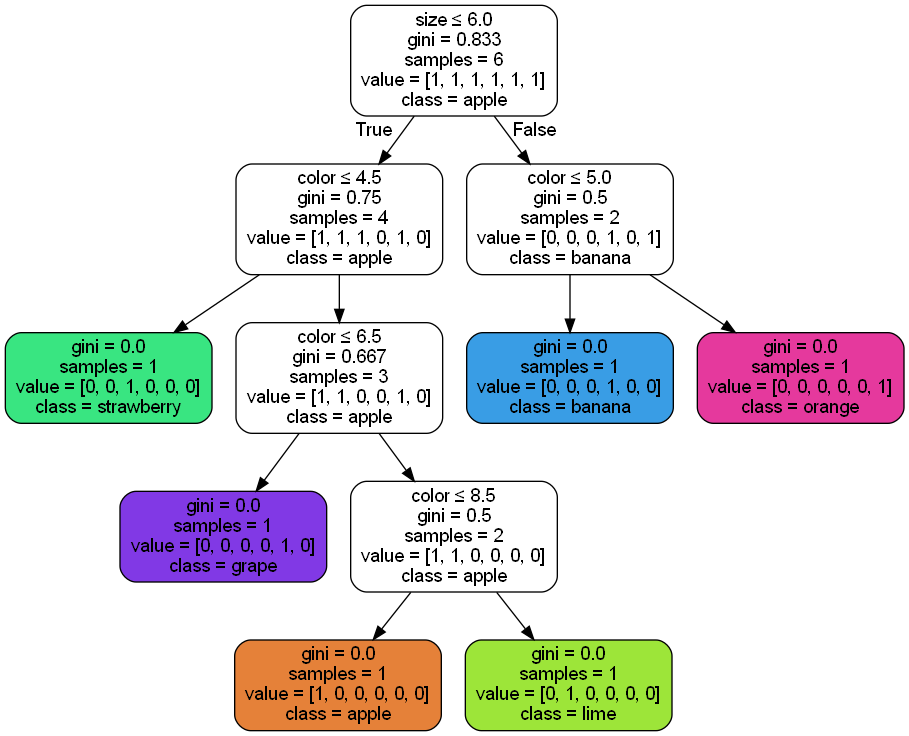

In [15]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

# ZZ : nous avions les valeurs svtes pour la classe :
#print(le.transform(["no", "yes"])) # donne [ 6 11]

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True,feature_names = ["color", 'size'], class_names=target_variable)
            #special_characters=True,feature_names = feature_cols, class_names=['Joue', 'Dont_Joue'])

# La ligne qui enlève la boite noire à coté de la racine (bug de  pydotplus)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace("\n", ""))
graph.write_png('fruit-gini.png')
Image(graph.create_png())

In [16]:
#Pour comprendre cet arbre, arppelons l'encodage :     
dictionary

{np.str_('apple'): np.int64(0),
 np.str_('banana'): np.int64(1),
 np.str_('grape'): np.int64(2),
 np.str_('green'): np.int64(3),
 np.str_('large'): np.int64(4),
 np.str_('lime'): np.int64(5),
 np.str_('orange'): np.int64(6),
 np.str_('red'): np.int64(7),
 np.str_('small'): np.int64(8),
 np.str_('strawberry'): np.int64(9),
 np.str_('yellow'): np.int64(10)}

In [17]:
df_encoded, df

(  color size fruit
 0     7    4     0
 1     3    8     5
 2     7    8     9
 3    10    4     1
 4     3    4     2
 5     6    4     6,
     color   size       fruit
 0     red  large       apple
 1   green  small        lime
 2     red  small  strawberry
 3  yellow  large      banana
 4   green  large       grape
 5  orange  large      orange)

### Arbre avec entropie

In [18]:
# Creation d'une instance de CART (version scikitlearn)  
clf = DecisionTreeClassifier(criterion = "entropy") #  
 

# Entrainement 
clf.fit(encoded_features, encoded_target)


DecisionTreeClassifier(criterion='entropy')

## L'abre n'est tout à fait la même.

True

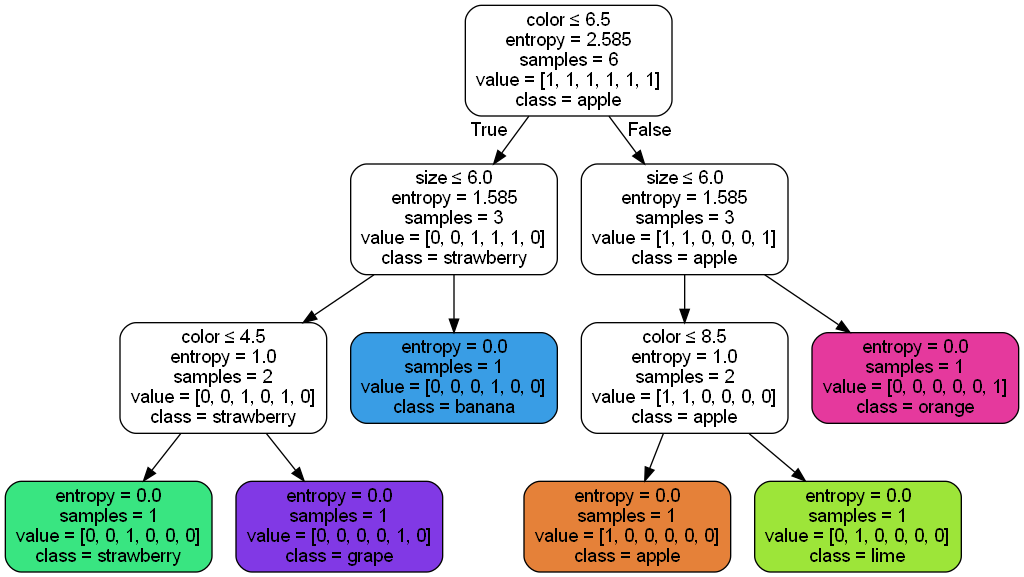

In [19]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

# ZZ : nous avions les valeurs svtes pour la classe :
#print(le.transform(["no", "yes"])) # donne [ 6 11]

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True,feature_names = ["color", 'size'], class_names=target_variable)
            #special_characters=True,feature_names = feature_cols, class_names=['Joue', 'Dont_Joue'])

# La ligne qui enlève la boite noire à coté de la racine (bug de  pydotplus)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace("\n", "")) 
graph.write_png('fruit-gini.png')
Image(graph.create_png())

In [20]:

# Prediction d'un nouveau cas
new_instance = ["red", "large"] 
encoded_new_instance = le.transform(new_instance) 
predicted_fruit_type = clf.predict([encoded_new_instance]) 
decoded_predicted_fruit_type = le.inverse_transform(predicted_fruit_type) 
print("Le fruit Predit :", decoded_predicted_fruit_type[0])


Le fruit Predit : apple


### Un autre test

In [21]:
new_instance = ["orange", "small"]
encoded_new_instance = le.transform(new_instance) 
predicted_fruit_type = clf.predict([encoded_new_instance]) 
decoded_predicted_fruit_type = le.inverse_transform(predicted_fruit_type) 
print("Le fruit Predit :", decoded_predicted_fruit_type[0])

Le fruit Predit : lime


### Remarquez : les prédictions  sont  les mêmes !